In [3]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('./data/villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

Question 2 : a)

In [5]:
pca = PCA(n_components=12)
pca.fit(X)
print(pca.explained_variance_ratio_)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
component = np.argmax(explained_variance_ratio >= 0.9) + 1
print(f"\n Nombre d'axes nécessaires pour au moins {0.9 * 100}% de l'information: {component}")

[0.87042713 0.12064247 0.00378357 0.00254544 0.00096575 0.00052796
 0.00038435 0.00032959 0.00017116 0.00012295 0.00007647 0.00002315]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


Pour conserver un minimum de 90% de l'information représentée dans le nuage initial, nous n'avons qu'à conserver les deux premiers axes. (0.87 + 0.12 = 0.99 > 0.90)

Question 2 : b)

Les deux axes principaux sont les directions dans lesquelles la variance des données est maximale. Les données climatiques des villes étant sujettes à des variations de températures saisonnières.

Le premier axe pourrait correspondre à la température moyenne des villes (les villes du sud auront des valeurs plus grandes que les villes du nord) car ça semble être la principale source de variation dans un ensemble de données climatiques. Le deuxième axe pourrait correspondre à la stabilité de la température selon les saisons.

Question 2 : c)

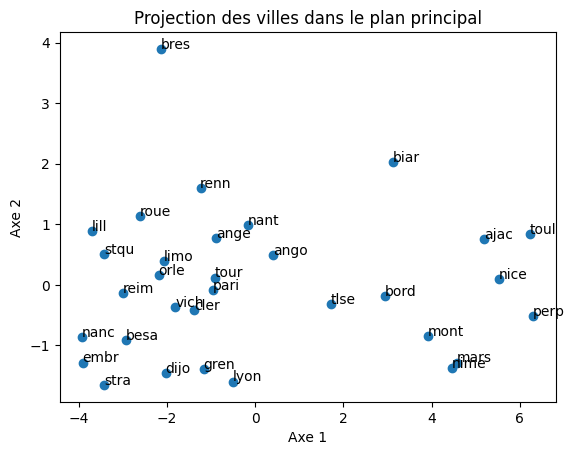

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Projection des villes dans le plan principal")
plt.show()

Question 2 : d)

Grâce aux données récupérées dans le nuage de points, nous pouvons remarquer que notre hypothèse effectuée dans la question b) est vérifiée, le premier axe correspond bien à la température moyenne avec les villes plus chaudes à droite et les froides à gauche et le deuxième correspond à la stabilité de la température selon les saisons.

Les villes plutot chaudes du sud de la France (Nice, Marseille, Montpellier, Toulouse, Ajaccio, Nimes) sont regroupées dans la partie du droite du graphique, avec des coordonnées positives sur l’axe 1. Les villes du nord et de l’est du pays (Strasbourg, Reims, Nancy) sont positionnées dans plutôt à gauche reflétant leurs températures annuelles plus basses. Les villes frontalières à l’Atlantique ou à la Manche (Brest, Biarritz, Nantes, Lille) sont situées plus haut dans le graphique (selon l'Axe 2) car elles ont un climat plus stable et tempéré.

On remarque, si on effectue une rotation de 90 sur la droite puis une symetrie horizontale de ce graphique, que cette visualisation rappelle la géographie de la france.

Question 2 : e)

In [7]:
def analyse_composante_principale(path_file : str, start_column_data : int, end_column_data : int):
    data = pd.read_csv('./' + path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components = end_column_data - start_column_data)
    pca.fit(X_scaled)
    print(pca.explained_variance_ratio_)

    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    component = np.argmax(explained_variance_ratio >= 0.9) + 1
    print(f"\n Nombre d'axes nécessaires pour au moins {0.9 * 100}% de l'information: {component}")

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des labels dans le plan principal")
    plt.show()

[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


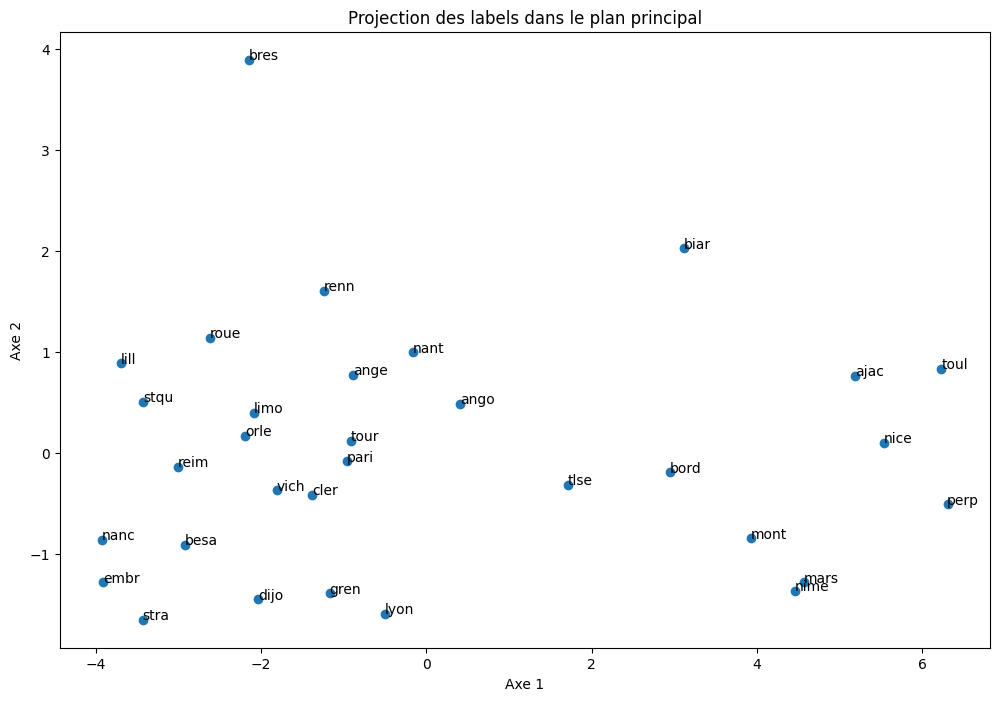

In [8]:
analyse_composante_principale('data/villes.csv', 1, 13)

Question 3

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 4


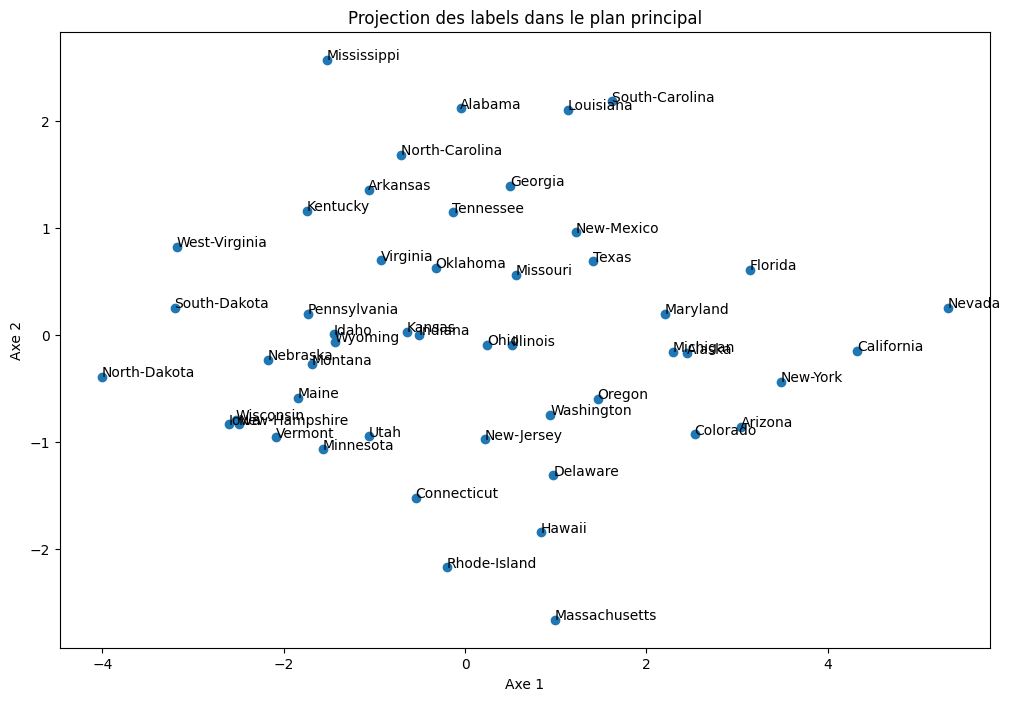

In [9]:
analyse_composante_principale('data/crimes.csv', 1, 8)

Grâce aux données récupérées avec notre fonctions, nous pouvons interpreter le premier axe comme étant l'intensité globale de la criminalité dans chaque état. A droite on retrouve ainsi les états à forte criminalité (Nevada, Califronie, New-York) en opposition aux états avec une plus faible criminalité comme le Dakota du Nord, ou la Virginie Occidentale.
Le deuxième axe correspondrait à la différence entre le nombre de crime le plus élevé et nombre le plus bas, ou plus précisément à la nature des crimes dominants. En haut du graphe on pourrait plutôt apercevoir une forte présence des crimes violents (meurtres, viols) par rapport au nombre de crimes totaux.

On peut visuellement apercevoir des petits regroupements, notamment selon l'axe 1. Il est possible d'identifier des états plus impactés par la criminalité que d'autres, et potentiellement le degré de dangerosité des crimes réalisés dans ces Etats. Cependant nous ne pouvons cependant rien déduire de précis concernant la typographie des données; en premier lieu parce que le nombre d'axes nécessaires pour expliquer au minimum 90% de l'information est de 4. Ainsi certains Etats proches sur le graphique pourraient en réalité être très différents si on les regardait dans d'autres dimensions.

Question 4

[0.66804393 0.25484695 0.07063561 0.00647351]

 Nombre d'axes nécessaires pour au moins 90.0% de l'information: 2


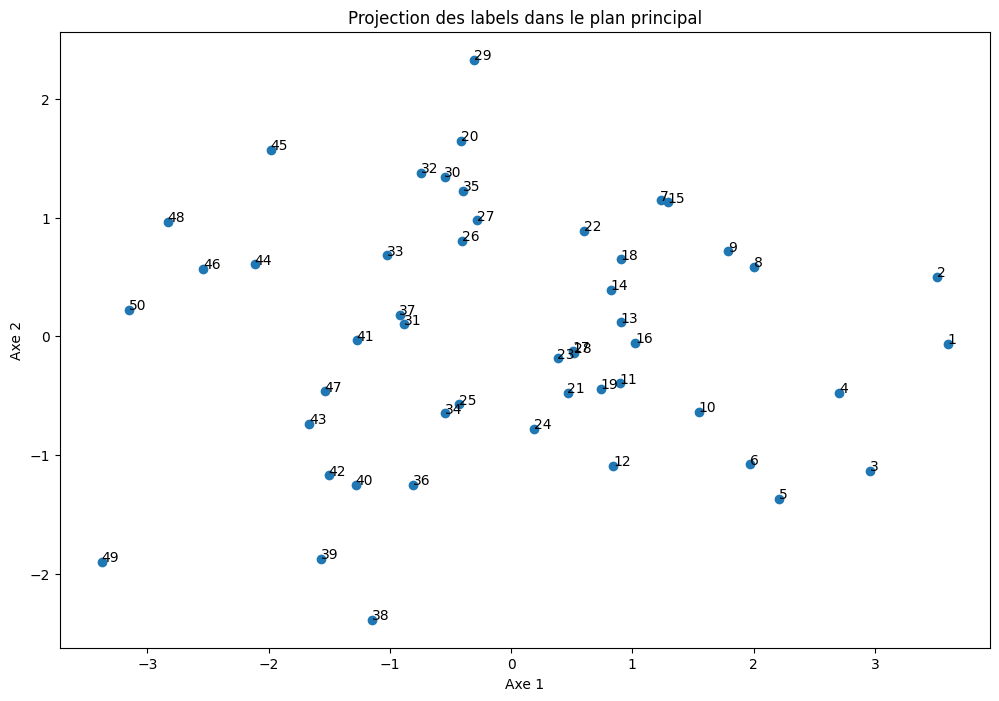

In [10]:
analyse_composante_principale('data/50_Startups.csv', 1, 5)

Grâce à ces données, nous pouvons supposer que le premier axe correspond aux dépenses liées aux marketing et à la R&D ainsi qu'aux bénéfices engrengés. C'est du moins la tendance qu'on semble observer mais si cela est inexacte pour certains points, avec à gauche des entreprises avec de faibles bénéfices et des investissements limités, tandis qu'à droite on observe des entreprises avec de forts bénéfices et de gros investissments en R&D et marketing.

Le deuxième axe semble correspondre à la quantité dépensée par les start-up dans l'administration : on retrouve tout en bas les start-ups ayant le moins dépensé comme les 38, 49 et 39, au contraire celles ayant le plus dépensées (29, 20 et 45) apparaissent totu en haut.

On peut faire une typologie des startups grâce à cette visualisaiton, en premier lieu parce que 90% de l'information est conservée sur 2 axes. L’axe 1 reflète la performance économique (bénéfices, R&D, marketing) et l’axe 2 la structure administrative. On distingue ainsi des startups rentables et bien structurées (sur le plan administratif), des startups axées sur le marketing/R&D et pqui sont performantes, d'autres qui privélégient l'administration mais qui sont peu rentables, et finalement des start ups peu structurées avec peu de bénfices.